# 1) Delivery_time -> Predict delivery time using sorting time 

In [212]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [213]:
deleviry=pd.read_csv('delivery_time.csv')
deleviry.head(50)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Understanding Data

In [214]:
deleviry.shape

(21, 2)

In [215]:
deleviry.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [216]:
deleviry=deleviry.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
deleviry

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Assumption Check

Text(0.5, 1.0, 'x vs Y')

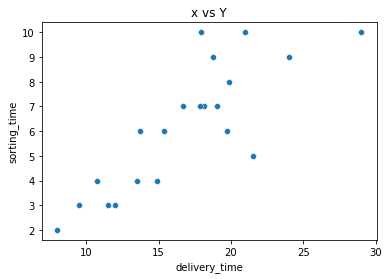

In [217]:
sn.scatterplot(x='delivery_time',y='sorting_time',data=deleviry)
plt.title('x vs Y')

<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

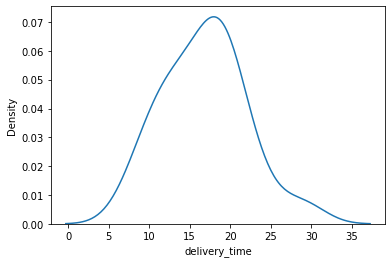

In [218]:
sn.kdeplot(x='delivery_time',data=deleviry)

<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

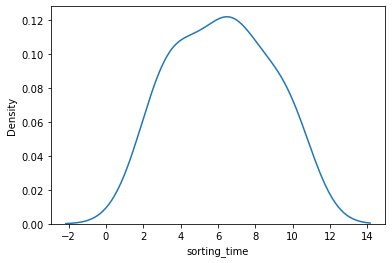

In [219]:
sn.kdeplot(x='sorting_time',data=deleviry) 

In [220]:
deleviry.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


# here we can se both features are coreleated and normaility test is passed

# model building

In [221]:
import statsmodels.formula.api as smf

In [222]:
linear_model1=smf.ols(formula='delivery_time~sorting_time',data=deleviry).fit()

In [223]:
linear_model.rsquared,linear_model.rsquared_adj

(0.6954434611324223, 0.6794141696130761)

In [224]:
linear_model1.rsquared,linear_model1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

Text(0.5, 1.0, 'x vs Y')

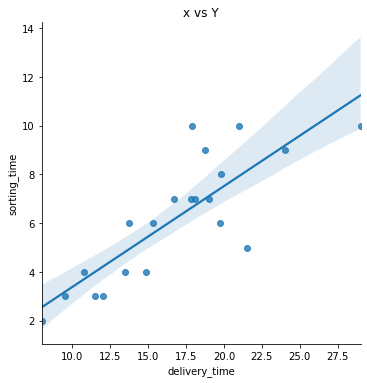

In [225]:
sn.lmplot(x='delivery_time',y='sorting_time',data=deleviry)
plt.title('x vs Y')

In [226]:
new_data=pd.Series([6,10])
new_data

0     6
1    10
dtype: int64

In [227]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,6
1,10


In [228]:
linear_model1.predict(data_pred)

0    16.476853
1    23.072933
dtype: float64

In [229]:
x=deleviry[['sorting_time']]
y=deleviry[['delivery_time']]

In [230]:
from sklearn.linear_model import LinearRegression

In [231]:
lin=LinearRegression()

In [232]:
lin.fit(x,y)

LinearRegression()

In [233]:
lin.predict([[7]])

array([[18.12587325]])

# ==========================================================================================================================

# Salary_hike -> Build a prediction model for Salary_hike


In [234]:
salary=pd.read_csv('Salary_Data.csv')

In [235]:
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [236]:
salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [237]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Text(0.5, 1.0, 'x vs Y')

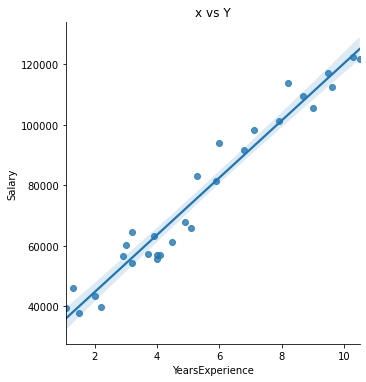

In [238]:
sn.lmplot(x='YearsExperience',y='Salary',data=salary)
plt.title('x vs Y')

In [239]:
linear_model2=smf.ols(formula='Salary~YearsExperience',data=salary).fit()

In [240]:
linear_model2.rsquared , linear_model2.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [241]:
new_data1=pd.Series([3.6,5.8,10.12])

In [242]:
data_pred1=pd.DataFrame(new_data1,columns=['YearsExperience'])
data_pred1

,YearsExperience
0,3.60
1,5.80
2,10.12


In [243]:
linear_model2.predict(data_pred1)

0     59812.064556
1     80601.981663
2    121425.818892
dtype: float64